In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from lightgbm import LGBMClassifier
from collections import Counter

%matplotlib inline

In [4]:
df = pd.read_csv('D:\\Playground-s5e7\\train.csv')


In [5]:
test = pd.read_csv('D:\\Playground-s5e7\\test.csv')

In [6]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,No,6.00,4.00,No,15.00,5.00,Extrovert
1,1,1.00,No,7.00,3.00,No,10.00,8.00,Extrovert
2,2,6.00,Yes,1.00,0.00,NaN,3.00,0.00,Introvert
3,3,3.00,No,7.00,3.00,No,11.00,5.00,Extrovert
4,4,1.00,No,4.00,4.00,No,13.00,NaN,Extrovert


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [8]:
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})

In [9]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,0.00,6.00,4.00,0.00,15.00,5.00,1
1,1,1.00,0.00,7.00,3.00,0.00,10.00,8.00,1
2,2,6.00,1.00,1.00,0.00,NaN,3.00,0.00,0
3,3,3.00,0.00,7.00,3.00,0.00,11.00,5.00,1
4,4,1.00,0.00,4.00,4.00,0.00,13.00,NaN,1


In [10]:
X = df.drop(columns = ['Personality'])
y = df['Personality']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=42)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12966 entries, 5905 to 15795
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         12966 non-null  int64  
 1   Time_spent_Alone           12122 non-null  float64
 2   Stage_fear                 11636 non-null  float64
 3   Social_event_attendance    12144 non-null  float64
 4   Going_outside              11915 non-null  float64
 5   Drained_after_socializing  12148 non-null  float64
 6   Friends_circle_size        12223 non-null  float64
 7   Post_frequency             12085 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 911.7 KB


In [13]:
X_train['Stage_fear'].value_counts()

Stage_fear
0.00    8809
1.00    2827
Name: count, dtype: int64

In [14]:
X_train['Drained_after_socializing'].value_counts()

Drained_after_socializing
0.00    9293
1.00    2855
Name: count, dtype: int64

In [15]:
X_train['Time_spent_Alone'] =  X_train['Time_spent_Alone'].fillna(X_train['Time_spent_Alone'].mean())
X_train['Drained_after_socializing'] = X_train['Drained_after_socializing'].fillna(1)
X_train['Stage_fear'] = X_train['Stage_fear'].fillna(1)
X_train['Friends_circle_size'] =  X_train['Friends_circle_size'].fillna(X_train['Friends_circle_size'].mean())
X_train['Post_frequency'] =  X_train['Post_frequency'].fillna(X_train['Post_frequency'].mean())
X_train['Social_event_attendance'] =  X_train['Social_event_attendance'].fillna(X_train['Social_event_attendance'].mean())
X_train['Going_outside'] =  X_train['Going_outside'].fillna(X_train['Going_outside'].mean())

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12966 entries, 5905 to 15795
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         12966 non-null  int64  
 1   Time_spent_Alone           12966 non-null  float64
 2   Stage_fear                 12966 non-null  float64
 3   Social_event_attendance    12966 non-null  float64
 4   Going_outside              12966 non-null  float64
 5   Drained_after_socializing  12966 non-null  float64
 6   Friends_circle_size        12966 non-null  float64
 7   Post_frequency             12966 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 911.7 KB


In [17]:
X_train.describe()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
count,12966.00,12966.00,12966.00,12966.00,12966.00,12966.00,12966.00,12966.00
mean,9261.26,3.15,0.32,5.24,4.04,0.28,8.02,4.96
std,5360.59,2.91,0.47,2.67,1.98,0.45,4.10,2.77
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4597.25,1.00,0.00,3.00,3.00,0.00,5.00,3.00
50%,9273.50,3.00,0.00,5.24,4.04,0.00,8.00,5.00
75%,13929.75,4.00,1.00,7.00,6.00,1.00,11.00,7.00
max,18523.00,11.00,1.00,10.00,7.00,1.00,15.00,10.00


In [18]:
A = X_train[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']]

In [19]:
vif_data = pd.DataFrame()
vif_data["feature"] = A.columns
vif_data.info()

vif_data["VIF"] = [variance_inflation_factor(A.values, i) for i in range(len(A.columns))]

print(vif_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  7 non-null      object
dtypes: object(1)
memory usage: 184.0+ bytes
                     feature  VIF
0           Time_spent_Alone 4.84
1                 Stage_fear 4.23
2    Social_event_attendance 8.02
3              Going_outside 8.09
4  Drained_after_socializing 5.23
5        Friends_circle_size 7.26
6             Post_frequency 6.74


<Axes: >

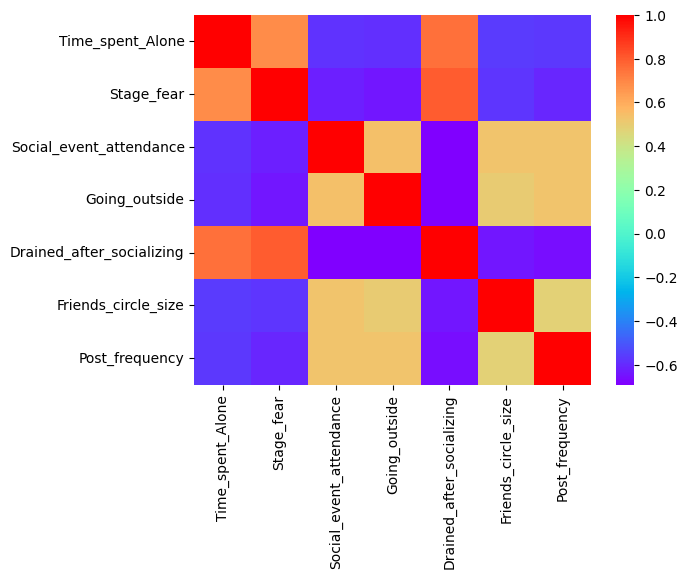

In [20]:
t = A.corr()
sns.heatmap(t, cmap = 'rainbow')

In [38]:
clf = LazyClassifier(verbose=0,predictions=True)
models_train, _ = clf.fit(A, A, y_train, y_train)
models_train

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 9584, number of negative: 3382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 12966, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.739164 -> initscore=1.041628
[LightGBM] [Info] Start training from score 1.041628


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.67
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.02
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.04
RandomForestClassifier,1.00,1.00,1.00,1.00,0.88
BaggingClassifier,0.99,0.99,0.99,0.99,0.16
LabelPropagation,0.99,0.99,0.99,0.99,13.87
LabelSpreading,0.99,0.98,0.98,0.99,19.84
XGBClassifier,0.98,0.97,0.97,0.98,0.34
LGBMClassifier,0.97,0.96,0.96,0.97,0.20


In [ ]:
#Addressing class imbalance using class weights



In [23]:
X_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
5905,5905,1.00,0.00,9.00,4.00,0.00,4.00,7.00
16801,16801,0.00,0.00,10.00,5.00,0.00,9.00,9.00
6395,6395,3.00,0.00,8.00,6.00,0.00,13.00,4.00
14183,14183,2.00,0.00,6.00,5.00,0.00,8.00,4.96
9981,9981,0.00,0.00,6.00,7.00,0.00,8.02,5.00


In [24]:
#Imputing missing values in validation data

X_val['Time_spent_Alone'] =  X_val['Time_spent_Alone'].fillna(X_train['Time_spent_Alone'].mean())
X_val['Drained_after_socializing'] = X_val['Drained_after_socializing'].fillna(1)
X_val['Stage_fear'] = X_val['Stage_fear'].fillna(1)
X_val['Friends_circle_size'] =  X_val['Friends_circle_size'].fillna(X_train['Friends_circle_size'].mean())
X_val['Post_frequency'] =  X_val['Post_frequency'].fillna(X_train['Post_frequency'].mean())
X_val['Social_event_attendance'] =  X_val['Social_event_attendance'].fillna(X_train['Social_event_attendance'].mean())
X_val['Going_outside'] =  X_val['Going_outside'].fillna(X_train['Going_outside'].mean())

In [25]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5558 entries, 13209 to 5123
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5558 non-null   int64  
 1   Time_spent_Alone           5558 non-null   float64
 2   Stage_fear                 5558 non-null   float64
 3   Social_event_attendance    5558 non-null   float64
 4   Going_outside              5558 non-null   float64
 5   Drained_after_socializing  5558 non-null   float64
 6   Friends_circle_size        5558 non-null   float64
 7   Post_frequency             5558 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 390.8 KB


In [26]:
B = X_val[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']]

In [40]:
clf = LazyClassifier(verbose=0,predictions=True)
models_validation, _ = clf.fit(A, B, y_train, y_val)
models_validation

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 9584, number of negative: 3382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 12966, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.739164 -> initscore=1.041628
[LightGBM] [Info] Start training from score 1.041628


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.97,0.96,0.96,0.97,0.04
AdaBoostClassifier,0.97,0.96,0.96,0.97,0.37
SGDClassifier,0.97,0.96,0.96,0.97,0.03
GaussianNB,0.97,0.96,0.96,0.97,0.02
LinearSVC,0.97,0.95,0.95,0.97,0.07
SVC,0.97,0.95,0.95,0.97,1.75
BernoulliNB,0.97,0.95,0.95,0.97,0.02
CalibratedClassifierCV,0.97,0.95,0.95,0.97,0.10
LogisticRegression,0.97,0.95,0.95,0.97,0.06


In [67]:
#AdaBoost

In [80]:
classes   = np.unique(y_train)
class_wts = compute_class_weight('balanced', classes=classes, y=y_train)
wt_map    = {cls: wt for cls, wt in zip(classes, class_wts)}
print("Class‑weight mapping:", wt_map)

Class‑weight mapping: {np.int64(0): np.float64(1.9169130691898284), np.int64(1): np.float64(0.6764398998330551)}


In [81]:
sample_weight = np.array([wt_map[label] for label in y_train])

In [82]:
stump = DecisionTreeClassifier(
    max_depth=1,
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced',      # <-- handles imbalance at stump level
    random_state=42
)


In [45]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "algorithm": ["SAMME", "SAMME.R"],
    "estimator__max_depth": [1, 2, 3],
    "estimator__min_samples_split": [2, 4, 6],
    "estimator__min_samples_leaf": [1, 2]
}

In [46]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=ada_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,       # all cores
    verbose=2,       
    return_train_score=True
)

grid.fit(A, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,estimator,AdaBoostClass...ndom_state=42)
,param_grid,"{'algorithm': ['SAMME', 'SAMME.R'], 'estimator__max_depth': [1, 2, ...], 'estimator__min_samples_leaf': [1, 2], 'estimator__min_samples_split': [2, 4, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [47]:
print("Best parameters:", grid.best_params_)
print(f"Mean CV accuracy: {grid.best_score_:.4f}")

Best parameters: {'algorithm': 'SAMME', 'estimator__max_depth': 1, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'learning_rate': 0.5, 'n_estimators': 200}
Mean CV accuracy: 0.9698


In [ ]:
best_ada = grid.best_estimator_

In [83]:

best_ada = AdaBoostClassifier(estimator=stump, n_estimators=200,learning_rate=0.5,algorithm="SAMME",random_state=42)


In [84]:
best_ada.fit(A, y_train, sample_weight=sample_weight)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,200
,learning_rate,0.5
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0



Training accuracy: 0.9449


In [68]:
#Random Forest Classifier

In [27]:
param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]}

In [22]:
rf_base = RandomForestClassifier(
    random_state=42,
    class_weight= 'balanced',     
    n_jobs=-1            
)

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=2,           
    return_train_score=True
)

In [29]:
grid.fit(A, y_train)

print("Best parameters:", grid.best_params_)
print(f"Mean CV (validation) accuracy: {grid.best_score_:.4f}")



Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean CV (validation) accuracy: 0.9696


In [ ]:
best_rf = grid.best_estimator_

In [32]:
best_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100, class_weight='balanced')
best_rf.fit(A,y_train)

train_acc = best_rf.score(A, y_train)
print(f"Training accuracy: {train_acc:.4f}")

# If you also want a separate hold‑out evaluation:
test_acc  = best_rf.score(B, y_val)
print(f"Test accuracy:     {test_acc:.4f}\n")

print("Classification report on validation set:")
print(classification_report(y_val, best_rf.predict(B)))

Training accuracy: 0.9707
Test accuracy:     0.9678

Classification report on validation set:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1443
           1       0.98      0.98      0.98      4115

    accuracy                           0.97      5558
   macro avg       0.96      0.96      0.96      5558
weighted avg       0.97      0.97      0.97      5558



In [42]:
y_train.value_counts()

Personality
1    9584
0    3382
Name: count, dtype: int64

In [43]:
scale = 9584/3382

In [ ]:
#XGB Classifier

In [46]:
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',          # better than accuracy for imbalance
    scale_pos_weight=scale,
    n_jobs=-1,
    random_state=42
)

In [48]:
param_distrib = {
    "n_estimators"     : [500, 700, 1000],
    "learning_rate"    : [0.01,0.1, 0.5],
    "max_depth"        : [3, 5, 8],
    "min_child_weight" : [1, 3]
}

In [52]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_distrib,             
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [53]:
search.fit(A,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'min_child_weight': [1, 3], 'n_estimators': [500, 700, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [54]:
best_xgb = search.best_estimator_
print("\nBest hyper‑parameters:\n", search.best_params_)
print(f"Best 5‑fold CV AUC: {search.best_score_:.4f}")


Best hyper‑parameters:
 {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500}
Best 5‑fold CV AUC: 0.9712


In [55]:
train_acc = best_xgb.score(A, y_train)
test_acc  = best_xgb.score(B,  y_val)

print(f"\nTraining accuracy: {train_acc:.4f}")
print(f"Testing  accuracy: {test_acc:.4f}")


Training accuracy: 0.9696
Testing  accuracy: 0.9665


In [ ]:
#LGBM Classifier

In [94]:
lgbm = LGBMClassifier(
    objective='binary',        # default is fine, but explicit is clearer
    boosting_type='gbdt',
    scale_pos_weight=scale,    # <-- core imbalance fix
    random_state=42,
    n_jobs=-1
)

In [88]:
param_grid = {
    "n_estimators"      : [300, 500, 700],          # more rounds → need lower LR
    "learning_rate"     : [0.01, 0.05, 0.1],        # keep coarse; no log‑grid needed
    "num_leaves"        : [31, 63, 127],            # capacity
    "max_depth"         : [-1, 5, 10],              # -1 = no limit
    "min_child_samples" : [20, 50, 100]            # regularisation
}

In [89]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
grid = GridSearchCV(
    estimator   = lgbm,
    param_grid  = param_grid,
    scoring     = "roc_auc",   
    cv          = cv,
    n_jobs      = -1,
    verbose     = 2
)

In [93]:
neg, pos = Counter(y_train)[0], Counter(y_train)[1]          # assumes labels 0 / 1
scale    = neg / pos                                         # > 1 if class 1 is minority
print(f"scale_pos_weight = {scale:.2f}")

sample_weight = np.where(y_train == 1, scale, 1.0)     

scale_pos_weight = 0.35


In [95]:
grid.fit(
    A,
    y_train,
    sample_weight=sample_weight            # <-- every inner fit gets weights
)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Number of positive: 9584, number of negative: 3382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 12966, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

,estimator,LGBMClassifie...3826138379657)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 5, ...], 'min_child_samples': [20, 50, ...], 'n_estimators': [300, 500, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [96]:
print("\nBest CV AUC :", grid.best_score_)
print("Best params :\n", grid.best_params_)

best_lgbm = grid.best_estimator_


Best CV AUC : 0.971309062237696
Best params :
 {'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 100, 'n_estimators': 500, 'num_leaves': 31}


In [97]:
train_acc = best_lgbm.score(A, y_train)
test_acc  = best_lgbm.score(B,  y_val)

print(f"\nTraining accuracy: {train_acc:.4f}")
print(f"Testing  accuracy: {test_acc:.4f}")


Training accuracy: 0.9698
Testing  accuracy: 0.9674


In [98]:
# Create an ensemble using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('rf1', best_rf),
    ('lgb', best_lgbm)
], voting='soft')  # 'soft' for soft voting


In [99]:
ensemble_classifier.fit(A, y_train)

[LightGBM] [Info] Number of positive: 9584, number of negative: 3382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 12966, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.739164 -> initscore=1.041628
[LightGBM] [Info] Start training from score 1.041628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,estimators,"[('rf', ...), ('rf1', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'entropy'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,4


In [100]:
# Predictions
y_pred = ensemble_classifier.predict(A)

# Evaluate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Ensemble Accuracy: {accuracy}')

Ensemble Accuracy: 0.9703069566558692


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           6175 non-null   float64
 2   Stage_fear                 6175 non-null   float64
 3   Social_event_attendance    6175 non-null   float64
 4   Going_outside              6175 non-null   float64
 5   Drained_after_socializing  6175 non-null   float64
 6   Friends_circle_size        6175 non-null   float64
 7   Post_frequency             6175 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 386.1 KB


In [34]:
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.00,No,7.00,4.00,No,6.00,NaN
1,18525,NaN,Yes,0.00,0.00,Yes,5.00,1.00
2,18526,3.00,No,5.00,6.00,No,15.00,9.00
3,18527,3.00,No,4.00,4.00,No,5.00,6.00
4,18528,9.00,Yes,1.00,2.00,Yes,1.00,1.00


In [35]:
test['Drained_after_socializing'] = test['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
test['Stage_fear'] = test['Stage_fear'].map({'Yes': 1, 'No': 0})

In [36]:
#Imputing missing values in test data

test['Time_spent_Alone'] = test['Time_spent_Alone'].fillna(X_train['Time_spent_Alone'].mean())
test['Drained_after_socializing'] = test['Drained_after_socializing'].fillna(1)
test['Stage_fear'] = test['Stage_fear'].fillna(1)
test['Friends_circle_size'] =  test['Friends_circle_size'].fillna(X_train['Friends_circle_size'].mean())
test['Post_frequency'] =  test['Post_frequency'].fillna(X_train['Post_frequency'].mean())
test['Social_event_attendance'] =  test['Social_event_attendance'].fillna(X_train['Social_event_attendance'].mean())
test['Going_outside'] =  test['Going_outside'].fillna(X_train['Going_outside'].mean())

In [37]:
test.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [38]:
M = test[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']]

In [39]:
M.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.00,0.00,7.00,4.00,0.00,6.00,4.96
1,3.15,1.00,0.00,0.00,1.00,5.00,1.00
2,3.00,0.00,5.00,6.00,0.00,15.00,9.00
3,3.00,0.00,4.00,4.00,0.00,5.00,6.00
4,9.00,1.00,1.00,2.00,1.00,1.00,1.00


In [64]:
pred = best_ada.predict(M)

In [78]:
len(pred)

6175

In [66]:
pd.Series(pred, name="pred").to_csv("pred.csv", index=False)

In [ ]:
pred = best_ada.predict(M)

In [40]:
pred = best_rf.predict(M)

In [41]:
pd.Series(pred, name="pred1").to_csv("pred1.csv", index=False)

In [57]:
pred = best_xgb.predict(M)
pd.Series(pred, name="pred2").to_csv("pred2.csv", index=False)

In [101]:
pred = ensemble_classifier.predict(M)
pd.Series(pred, name="pred4").to_csv("pred4.csv", index=False)

In [102]:
pred = best_lgbm.predict(M)
pd.Series(pred, name="pred5").to_csv("pred5.csv", index=False)